In [2]:
import networkx as nx
import matplotlib.pyplot as plt

class grafo:
    def __init__(self, file_path):
        self.file_path = file_path
        self.num_vertices = 0
        self.matriz_adjacencia = []
        self.ler_grafo_matriz_adjacencia()
    
    def ler_grafo_matriz_adjacencia(self):
        with open(self.file_path, 'r') as file:
            linhas = file.readlines()
        
        # Lê o número de vértices
        self.num_vertices = int(linhas[0].strip())
        
        # Inicializa a matriz de adjacência
        self.matriz_adjacencia = []
        
        # Lê a matriz de adjacência
        for linha in linhas[1:]:
            self.matriz_adjacencia.append([int(x) for x in linha.strip().split()])
    
    def __str__(self):
        return f"Número de vértices: {self.num_vertices}"
    
    def plot_grafo(self, nome, seed):
        
        G = nx.Graph()
        for i in range(self.num_vertices):
            for j in range(self.num_vertices):
                if self.matriz_adjacencia[i][j] != 0:
                    G.add_edge(i, j, weight=self.matriz_adjacencia[i][j])
        
        pos = nx.spring_layout(G, seed=seed)  # Seed for reproducibility
        weights = nx.get_edge_attributes(G, 'weight')
        
        plt.figure(figsize=(15, 15))
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=300, font_size=10, font_weight='bold')
    
        plt.savefig(nome + '.pdf', dpi=500)
        plt.show()


    
files_paths = ['grafos/Entrada 10.txt', 
               'grafos/Entrada 25.txt',
                'grafos/Entrada 50.txt',
                'grafos/Entrada 75.txt',
               'grafos/Entrada 100.txt',
                'grafos/Entrada 150.txt', 
                'grafos/Entrada 200.txt', 
                'grafos/Entrada 250.txt', 
                'grafos/Entrada 300.txt', 
                'grafos/Entrada 400.txt', 
                'grafos/Entrada 500.txt', 
                'grafos/Entrada 650.txt',
                'grafos/Entrada 800.txt',
               'grafos/Entrada 1000.txt', 
               'grafos/Entrada 1500.txt']

vetor_grafos = []
for file_path in files_paths:
    g = grafo(file_path)
    vetor_grafos.append(g)
    print(g)




Número de vértices: 10
Número de vértices: 25
Número de vértices: 50
Número de vértices: 75
Número de vértices: 100
Número de vértices: 150
Número de vértices: 200
Número de vértices: 250
Número de vértices: 300
Número de vértices: 400
Número de vértices: 500
Número de vértices: 650
Número de vértices: 800
Número de vértices: 1000
Número de vértices: 1500


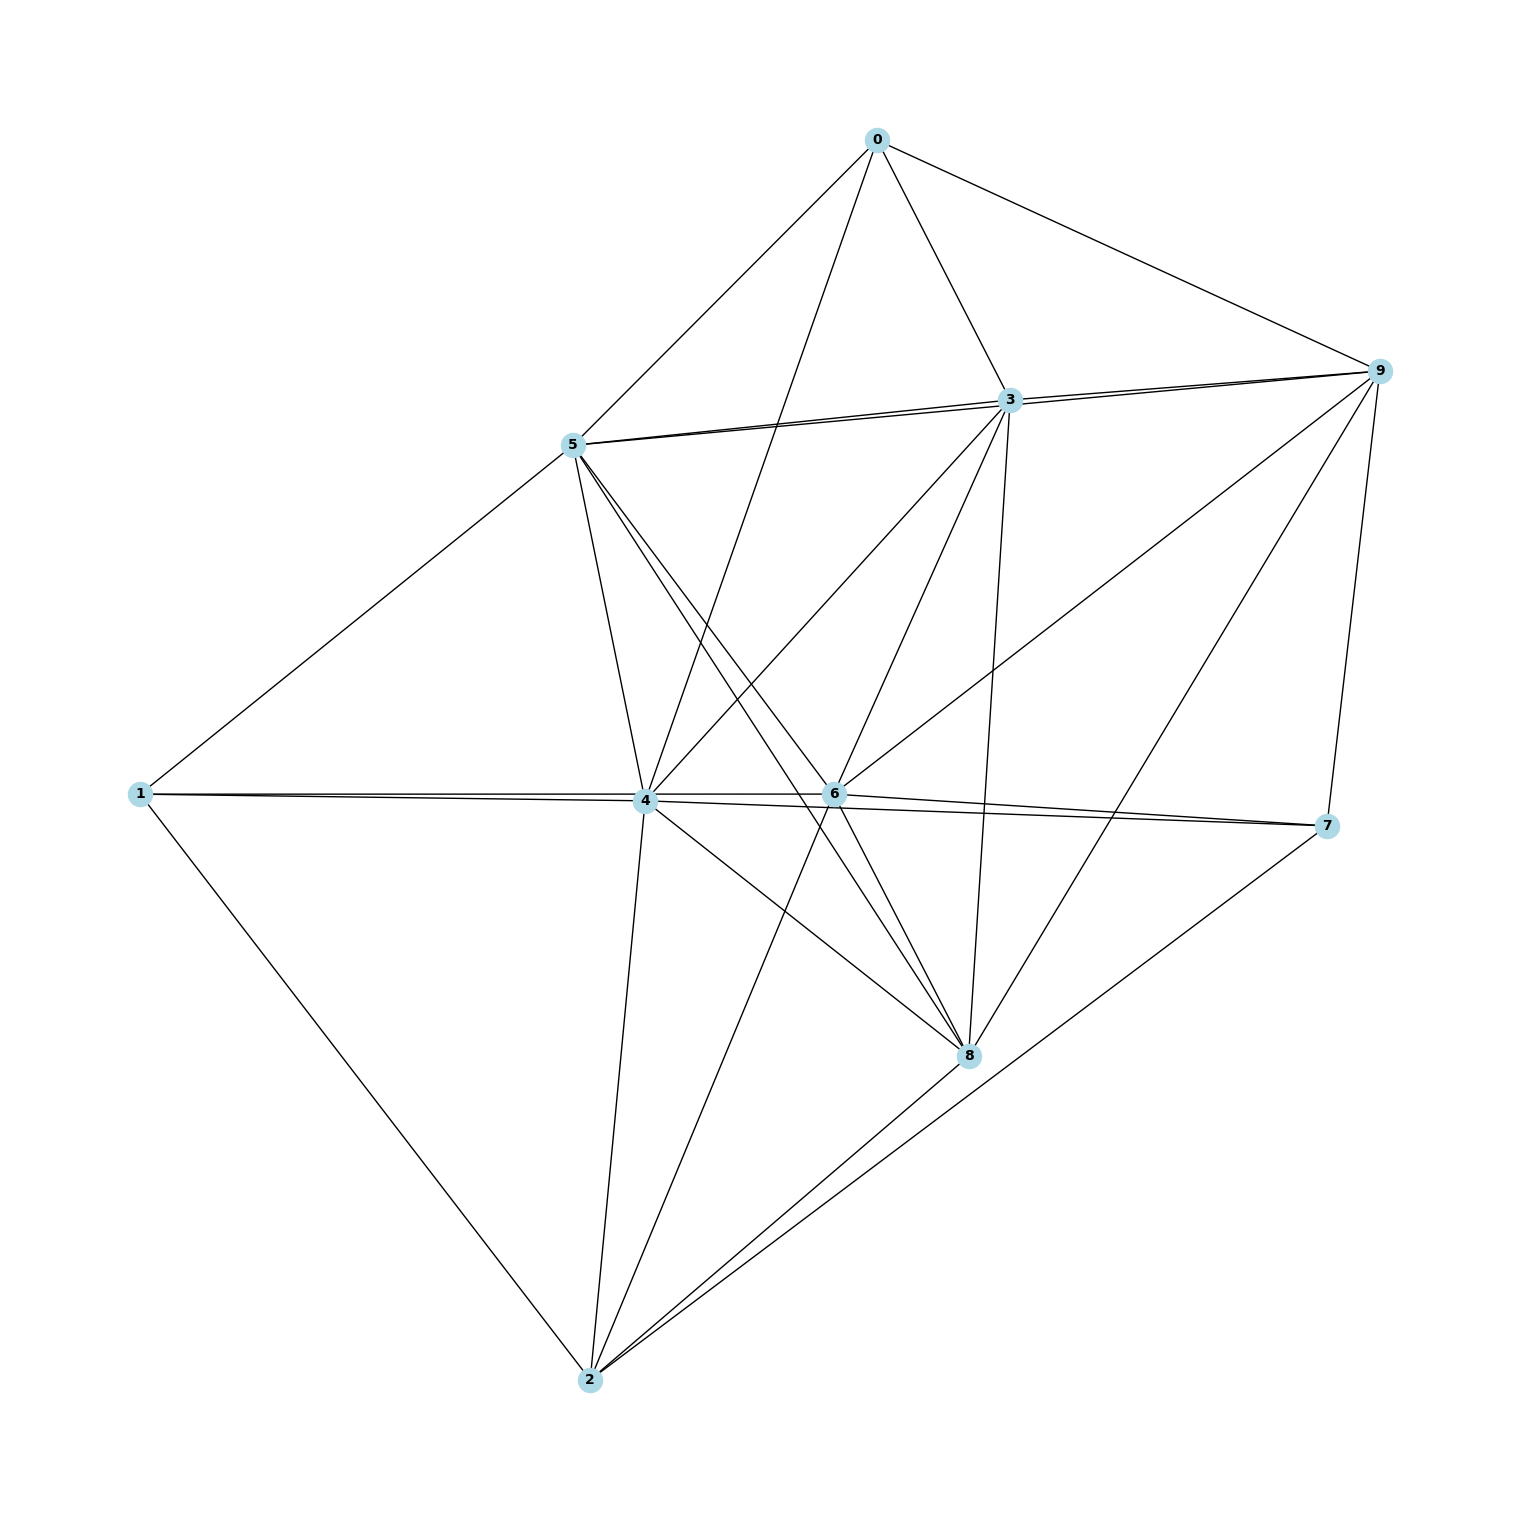

Entrada 10
------------------------------------------


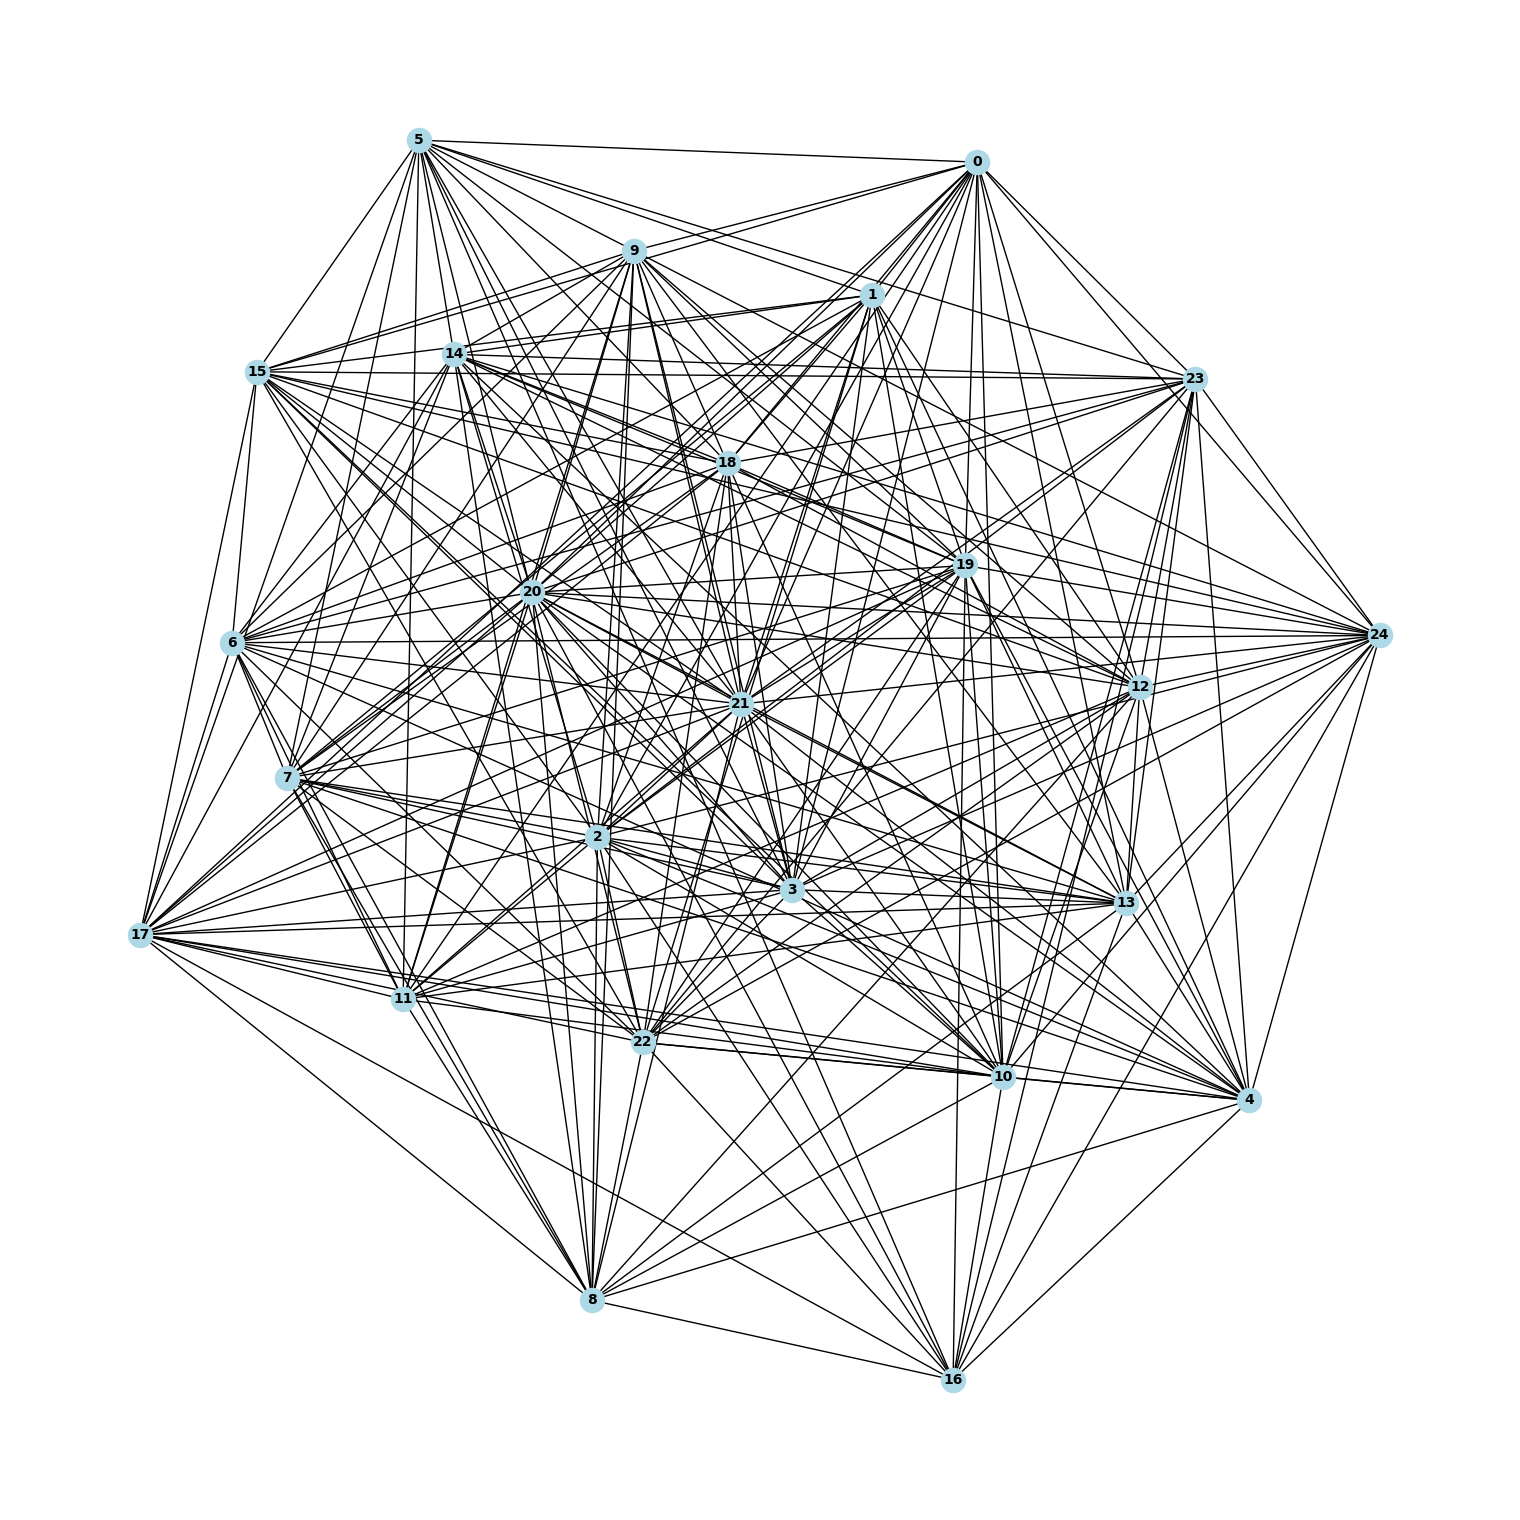

Entrada 25
------------------------------------------


In [3]:
g = vetor_grafos[0]
g.plot_grafo(g.file_path.split('/')[1][:-4], 42)
print(g.file_path.split('/')[1][:-4])
print('------------------------------------------')


g = vetor_grafos[1]
g.plot_grafo(g.file_path.split('/')[1][:-4], 42)
print(g.file_path.split('/')[1][:-4])
print('------------------------------------------')

In [ ]:
import time

def dijkstra(matriz_adjacencia, vertice_inicial, vertice_final):
    tempo_inicio = time.time()
    
    num_vertices = len(matriz_adjacencia)
    dist = [float('inf')] * num_vertices
    dist[vertice_inicial] = 0
    visitado = [False] * num_vertices
    anterior = [-1] * num_vertices
    
    for _ in range(num_vertices):
        min_dist = float('inf')
        vertice_atual = -1
        
        for vertice in range(num_vertices):
            if not visitado[vertice] and dist[vertice] < min_dist:
                min_dist = dist[vertice]
                vertice_atual = vertice
        
        if vertice_atual == -1:
            break
        
        visitado[vertice_atual] = True
        
        for vizinho, peso in enumerate(matriz_adjacencia[vertice_atual]):
            if peso > 0 and not visitado[vizinho]:
                nova_dist = dist[vertice_atual] + peso
                if nova_dist < dist[vizinho]:
                    dist[vizinho] = nova_dist
                    anterior[vizinho] = vertice_atual
    
    caminho = []
    vertice_atual = vertice_final
    while vertice_atual != -1:
        caminho.insert(0, vertice_atual)
        vertice_atual = anterior[vertice_atual]
    
    tempo_fim = time.time()
    tempo_total = tempo_fim - tempo_inicio
    
    return caminho, dist[vertice_final], tempo_total

# Exemplo de uso
vertice_inicial = 0  # Vértice de origem
vertice_final = 3  # Vértice de destino
caminho, custo_total, tempo_execucao = dijkstra(vetor_grafos[].matriz_adjacencia, vertice_inicial, vertice_final)
print(f"Melhor caminho do vértice {vertice_inicial} ao vértice {vertice_final}: {caminho}")
print(f"Custo total: {custo_total}")
print(f"Tempo de execução: {tempo_execucao} segundos")

Melhor caminho do vértice 0 ao vértice 3: [0, 63, 106, 132, 115, 3]
Custo total: 6
Tempo de execução: 0.0020117759704589844 segundos
